## Notebook to explore downloaded metadata from Mapillary

In [1]:
from streetscapes.streetview import SVWorkspace
import contextily

In [ ]:
ws = SVWorkspace("Amsterdam")
metadata = ws.load_metadata()
metadata

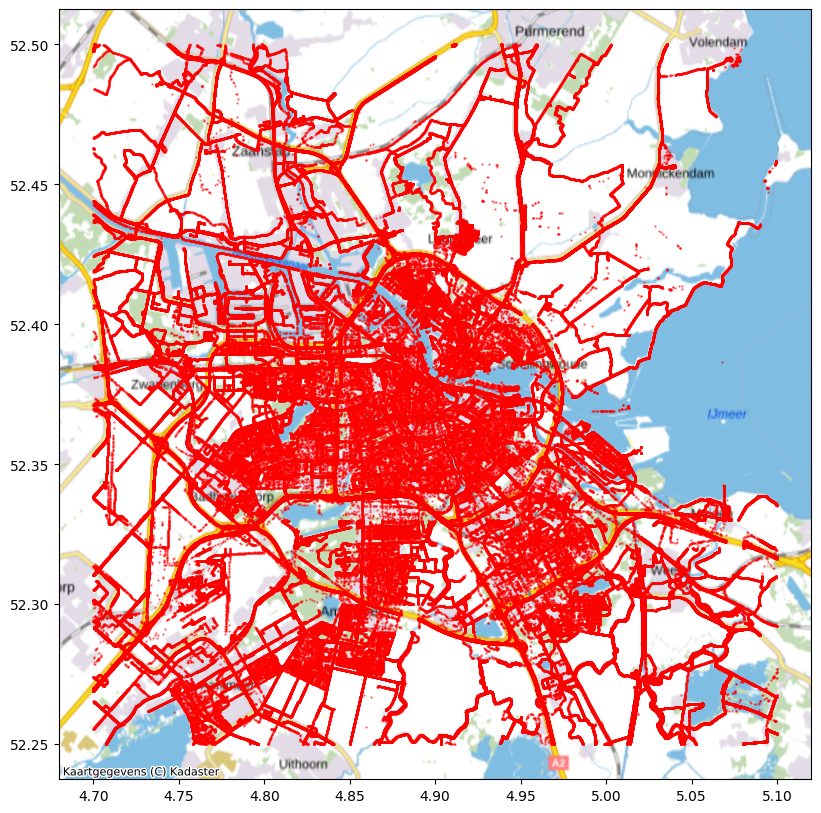

In [6]:
ax = metadata.plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=metadata.crs, source=contextily.providers.nlmaps.standaard
)

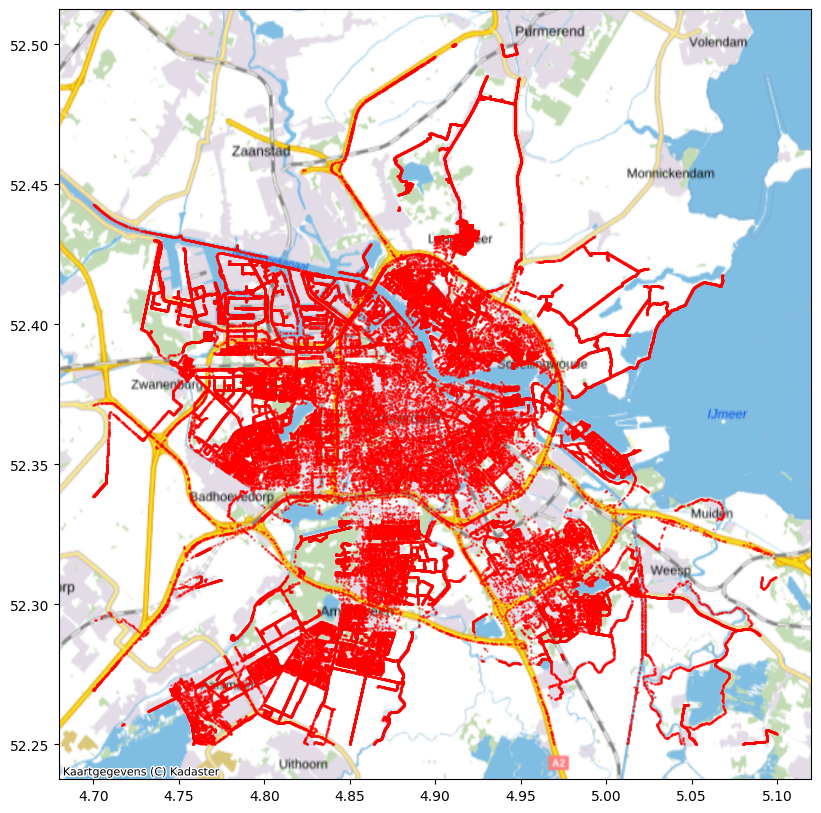

In [7]:
ax = metadata.query('is_pano').plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=metadata.crs, source=contextily.providers.nlmaps.standaard
)

In [10]:
metadata.columns

Index(['id', 'altitude', 'atomic_scale', 'camera_type', 'captured_at',
       'compass_angle', 'computed_altitude', 'computed_compass_angle',
       'computed_rotation', 'exif_orientation', 'height', 'is_pano', 'make',
       'model', 'thumb_256_url', 'thumb_1024_url', 'thumb_2048_url',
       'thumb_original_url', 'sequence', 'width', 'computed_geometry.type',
       'computed_geometry.coordinates', 'geometry.type',
       'geometry.coordinates', 'lon', 'lat', 'geometry'],
      dtype='object')

In [ ]:
# Convert time stamp to datetime or str

from datetime import datetime, timezone

metadata['captured_at_dt'] = metadata['captured_at'].apply(
    lambda ms: datetime.fromtimestamp(ms / 1000, tz=timezone.utc)
)
metadata['captured_at_str'] = metadata['captured_at_dt'].apply(
    lambda dt: dt.strftime('%Y%m%d%H%M%S')
)

In [13]:
metadata

,id,altitude,atomic_scale,camera_type,captured_at,compass_angle,computed_altitude,computed_compass_angle,computed_rotation,exif_orientation,...,width,computed_geometry.type,computed_geometry.coordinates,geometry.type,geometry.coordinates,lon,lat,geometry,captured_at_dt,captured_at_str
0,663413764651658,7.035341,0.976458,perspective,1635089189000,172.713369,6.239476,146.985504,"[0.48913001779865, -2.1221641908862, 1.6183096...",1,...,4000,Point,"[5.0485453930774, 52.253861781945]",Point,"[5.0486141296667, 52.253883023333]",5.048614,52.253883,POINT (5.04861 52.25388),2021-10-24 15:26:29+00:00,20211024152629
1,3865419186838917,4.910000,0.998205,perspective,1565522021000,109.912196,1.770681,111.739395,"[1.0182692437772, -1.4039376546972, 1.56945506...",1,...,4000,Point,"[5.0466734623748, 52.252818185238]",Point,"[5.0466802809, 52.252811864]",5.046680,52.252812,POINT (5.04668 52.25281),2019-08-11 11:13:41+00:00,20190811111341
2,5139654559435284,-4.026667,1.022048,perspective,1584808375000,157.187633,2.017913,152.754664,"[0.50810461415046, -1.9175127626689, 2.0188946...",1,...,4000,Point,"[5.0488442262364, 52.256431015497]",Point,"[5.0487897545, 52.2564672958]",5.048790,52.256467,POINT (5.04879 52.25647),2020-03-21 16:32:55+00:00,20200321163255
3,107489668250183,-1.030200,0.999098,perspective,1624364338476,140.709045,2.017469,134.669351,"[0.74030280773416, -1.7680286974945, 1.7483223...",1,...,4032,Point,"[5.0440796286181, 52.256752616836]",Point,"[5.04409598, 52.25671284]",5.044096,52.256713,POINT (5.0441 52.25671),2021-06-22 12:18:58.476000+00:00,20210622121858
4,264241782079970,0.000000,0.992372,perspective,1474376360000,174.753647,1.911718,176.768253,"[0.021984974927383, -2.1224126301495, 2.224884...",1,...,4608,Point,"[5.0434452756108, 52.254778372568]",Point,"[5.043455, 52.25478]",5.043455,52.254780,POINT (5.04346 52.25478),2016-09-20 12:59:20+00:00,20160920125920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,224598779432057,5.277500,1.001628,perspective,1498494359000,66.000000,2.388055,70.892311,"[1.2942997517974, -0.96887606632266, 0.9347106...",1,...,4000,Point,"[4.9062046976642, 52.44337135099]",Point,"[4.906211, 52.44335]",4.906211,52.443350,POINT (4.90621 52.44335),2017-06-26 16:25:59+00:00,20170626162559
135,925399894920565,5.930000,1.074802,perspective,1498494161000,160.000000,3.992881,178.039041,"[0.056776920873752, -2.1967425668962, 2.228411...",1,...,4000,Point,"[4.9041376068028, 52.446557851944]",Point,"[4.904106, 52.44661]",4.904106,52.446610,POINT (4.90411 52.44661),2017-06-26 16:22:41+00:00,20170626162241
136,134820245249795,5.670000,1.074271,perspective,1498494141000,133.000000,3.536386,145.839174,"[0.44981395791812, -1.8385046911544, 1.8331127...",1,...,4000,Point,"[4.9033789828842, 52.447657817462]",Point,"[4.903398, 52.44767]",4.903398,52.447670,POINT (4.9034 52.44767),2017-06-26 16:22:21+00:00,20170626162221
137,3944970478924443,5.710000,1.000000,perspective,1498494119000,78.000000,2.000005,76.902068,"[1.2250898090731, -1.0978678100119, 0.95228469...",1,...,4000,Point,"[4.9016230087105, 52.448030000809]",Point,"[4.901623, 52.44803]",4.901623,52.448030,POINT (4.90162 52.44803),2017-06-26 16:21:59+00:00,20170626162159


In [24]:
# Filter for panoramic images facing northwest and captured in 2020's
# metadata.query("is_pano").query("compass_angle>315").query('captured_at_str.str.startswith("202")')

# Or a combined query
pano = "is_pano"
northwest = "compass_angle > 315"
twenties = 'captured_at_str.str.startswith("202")'
combined_query = "&".join([pano, northwest, twenties])

subset = metadata.query(combined_query)
subset

,id,altitude,atomic_scale,camera_type,captured_at,compass_angle,computed_altitude,computed_compass_angle,computed_rotation,exif_orientation,...,width,computed_geometry.type,computed_geometry.coordinates,geometry.type,geometry.coordinates,lon,lat,geometry,captured_at_dt,captured_at_str
5,611261891337289,-9.375554,0.989293,spherical,1734081952001,315.521183,0.766599,309.491678,"[1.4883247720401, 0.72902701684215, -0.6538698...",1,...,4096,Point,"[5.0466764871822, 52.255759265512]",Point,"[5.0466666015082, 52.255766879579]",5.046667,52.255767,POINT (5.04667 52.25577),2024-12-13 09:25:52.001000+00:00,20241213092552
23,2435208886815356,-9.214410,1.006176,spherical,1734081936252,335.339353,1.279265,329.431587,"[1.5725624161816, 0.46485944215061, -0.3778254...",1,...,4096,Point,"[5.0482085906386, 52.254470454496]",Point,"[5.0482125466667, 52.254464137778]",5.048213,52.254464,POINT (5.04821 52.25446),2024-12-13 09:25:36.252000+00:00,20241213092536
58,8872783122837444,-9.384610,1.006449,spherical,1734081929712,356.035648,1.590339,352.842098,"[1.6192359350142, 0.13258771694876, -0.0665533...",1,...,4096,Point,"[5.0485017556298, 52.253841361381]",Point,"[5.0485068780769, 52.253836243654]",5.048507,52.253836,POINT (5.04851 52.25384),2024-12-13 09:25:29.712000+00:00,20241213092529
91,887786363525771,-9.566394,1.006479,spherical,1734081928344,352.759174,1.664549,357.351461,"[1.6145517848268, 0.053004069582522, -0.020714...",1,...,4096,Point,"[5.0485079272044, 52.253704943881]",Point,"[5.0485167688033, 52.253698032129]",5.048517,52.253698,POINT (5.04852 52.2537),2024-12-13 09:25:28.344000+00:00,20241213092528
95,1634804564139018,-9.297485,0.995392,spherical,1734081917066,325.586541,2.474692,319.789472,"[1.5438821305995, 0.53474126447212, -0.5690741...",1,...,4096,Point,"[5.0485520219192, 52.252647280763]",Point,"[5.0485614232983, 52.252645130244]",5.048561,52.252645,POINT (5.04856 52.25265),2024-12-13 09:25:17.066000+00:00,20241213092517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1659659114836303,-8.194447,NaN,spherical,1718904488339,347.304436,NaN,NaN,None,1,...,4096,None,None,Point,"[4.9682126273172, 52.253456062725]",4.968213,52.253456,POINT (4.96821 52.25346),2024-06-20 17:28:08.339000+00:00,20240620172808
932,1695101154641257,-8.468485,NaN,spherical,1718904485937,347.205256,NaN,NaN,None,1,...,4096,None,None,Point,"[4.9684202101279, 52.252905572699]",4.968420,52.252906,POINT (4.96842 52.25291),2024-06-20 17:28:05.937000+00:00,20240620172805
985,1175759723699535,-4.942090,NaN,spherical,1718904512230,347.247606,NaN,NaN,None,1,...,4096,None,None,Point,"[4.9661536072237, 52.258856625918]",4.966154,52.258857,POINT (4.96615 52.25886),2024-06-20 17:28:32.230000+00:00,20240620172832
986,2312894822381347,-3.954110,NaN,spherical,1718904515400,344.628020,NaN,NaN,None,1,...,4096,None,None,Point,"[4.9658760506251, 52.25952992691]",4.965876,52.259530,POINT (4.96588 52.25953),2024-06-20 17:28:35.400000+00:00,20240620172835


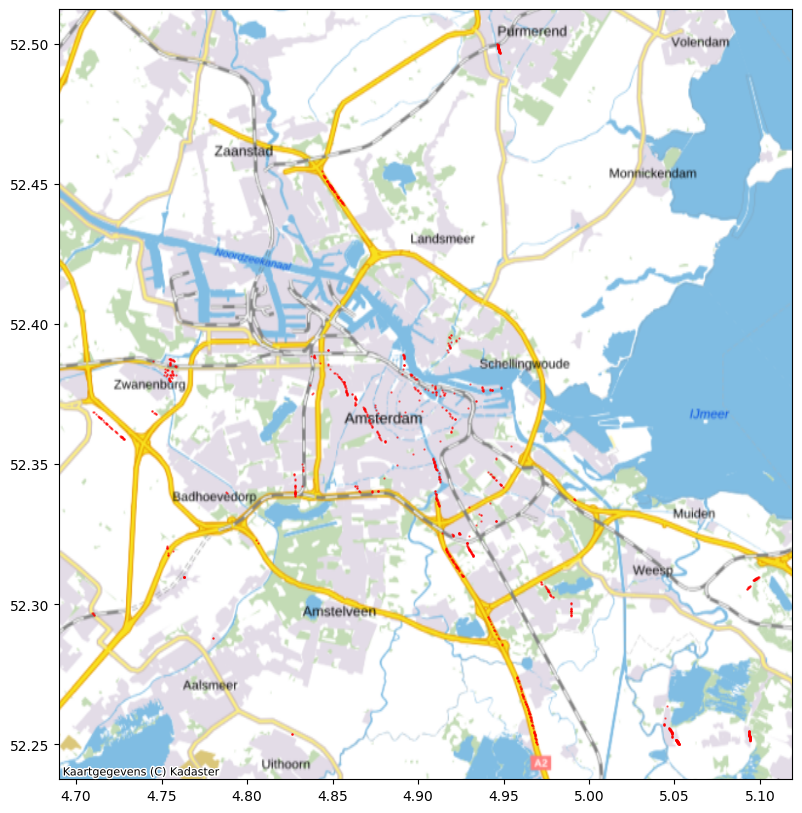

In [25]:
ax = subset.query('is_pano').plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=subset.crs, source=contextily.providers.nlmaps.standaard
)